In [24]:
import pandas as pd
import numpy as np
import os
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
import os

os.chdir("/workspaces/housingprices")
print("catalog:", os.getcwd())


catalog: /workspaces/housingprices


In [26]:
import pandas as pd

train_df = pd.read_csv("outputs/datasets/cleaned/TrainSetCleaned.csv")
print("TrainSetCleaned.csv is read!")


TrainSetCleaned.csv is read!


Actual working catalog: /workspaces
Mean Squared Error: 1486553108.22
R² Score: 0.81
model saved to: outputs/models/best_model.pkl


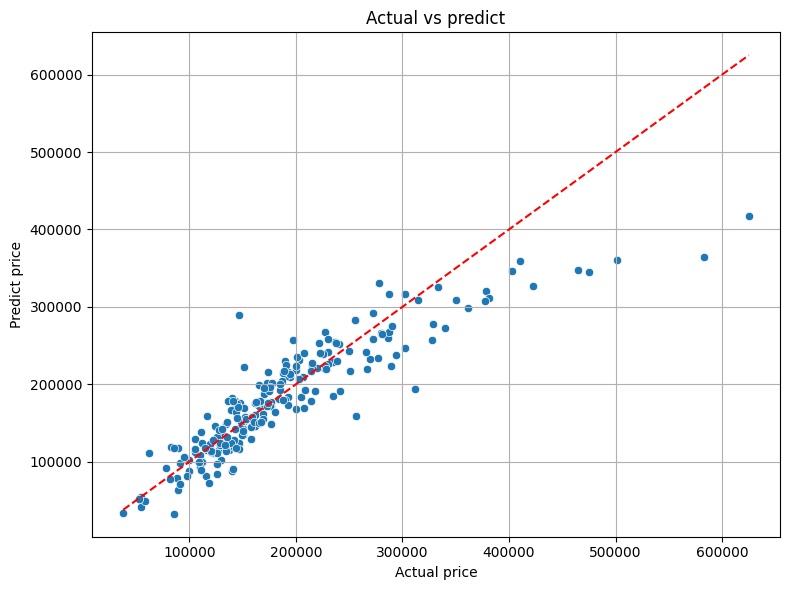

Predict price for example houses: $222,691


In [27]:
import pandas as pd
import numpy as np
import os
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

current_dir = os.getcwd()
os.chdir(os.path.dirname(current_dir)) 
print("Actual working catalog:", os.getcwd())

train_df = pd.read_csv("housingprices/outputs/datasets/cleaned/TrainSetCleaned.csv")

features = ["OverallQual", "GrLivArea", "GarageArea", "TotalBsmtSF", "YearBuilt"]
X = train_df[features]
y = train_df["SalePrice"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


model_path = "outputs/models/best_model.pkl"
os.makedirs(os.path.dirname(model_path), exist_ok=True)
joblib.dump(model, model_path)
print(f"model saved to: {model_path}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual price")
plt.ylabel("Predict price")
plt.title("Actual vs predict")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.tight_layout()
plt.show()


example_house = pd.DataFrame({
    "OverallQual": [7],
    "GrLivArea": [1800],
    "GarageArea": [500],
    "TotalBsmtSF": [1000],
    "YearBuilt": [2005]
})
predicted_price = model.predict(example_house)[0]
print(f"Predict price for example houses: ${predicted_price:,.0f}")
